## IE708 - Projeto Final


### Samuel Borges Ferreira Gomes | RA: 261663
### Prof. Michel Daoud Yacoub
### 2019.1

#### Parte 1.

Nessa primeira parte, encontramemos a probabilidade de *outage* (probabilidade da SNR do sinal recebido seja menor ou igual a um *threshold*) para o esquema de diversidade *Pure Selection* da distribuição [$\kappa-\mu$](http://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf).

Para o *Pure Selection*, a probabilidade de *outage* é dada por $P_{out}(\gamma) = F_\gamma(\gamma)^M$, onde $M$ é o número de ramos de diversidade, e $F_\gamma(\gamma)$ é a distribuição acumulada (CDF), dada por:
$F_\gamma(\gamma) = 1 - Q_\mu(\sqrt{2\kappa\mu},\sqrt{2(1+\kappa)\mu10^\frac{\gamma_m}{10}})$.

* $Q_\nu(a,b) = \dfrac{1}{a^{\nu-1}}\displaystyle\int_{b}^\infty x^\nu \exp\left(\frac{-(x^2+a^2)}{2}\right)I_{\nu-1}(ax)dx$ representa a função generalizada Marcum-Q; 
* $I_\nu(\cdot)$ a função modificada de *Bessel* do primeiro tipo e ordem $\nu$;
* $\gamma_m = \dfrac{\gamma}{\bar{\gamma}}$ a razão entre a SNR instantânea $\gamma$ e a SNR/bit média do sistema $\bar{\gamma}$.








Os plots foram feitos no *software* **Wolfram Mathematica 11.2.0.0** (ver arquivo parte1.nb), com as seguintes características:
* $\kappa$ fixo igual a 2
* $\mu$ variando de 1 a 4

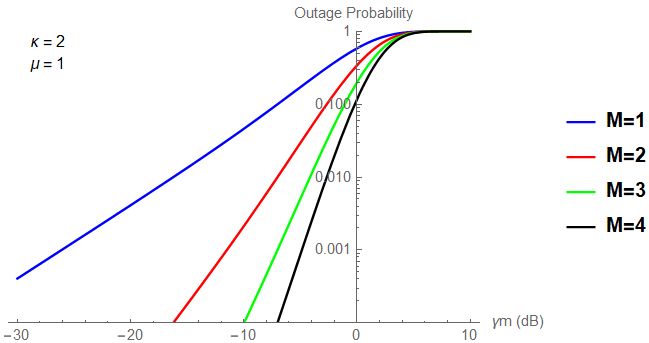

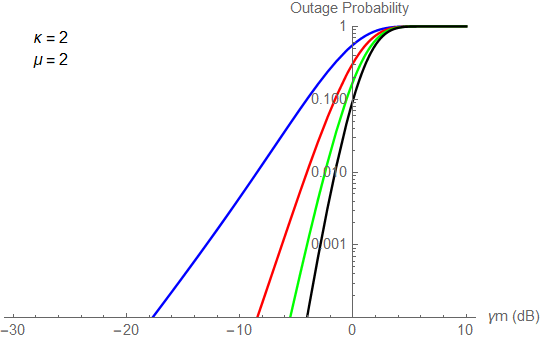

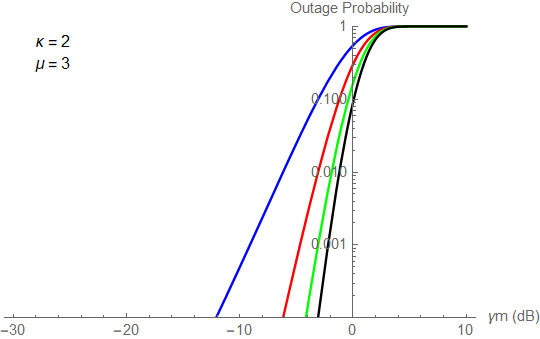

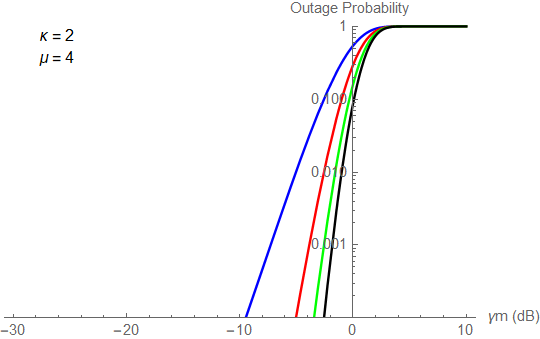

In [1]:
%matplotlib inline
from IPython.display import Image
from IPython.display import display
x = Image(filename='fig1.png') 
y = Image(filename='fig2.png')
z = Image(filename='fig3.png')
k = Image(filename='fig4.png')
display(x, y, z, k)

É importante notar que o primeiro dos plots acima representa a curva da **distribuição Rice** ($\kappa = 2$ e $\mu = 1$).

A seguir, mostraremos as curvas (ainda o arquivo parte1.nb) para $\mu = 2$ fixo, e $\kappa$ variando de 0 a 3.

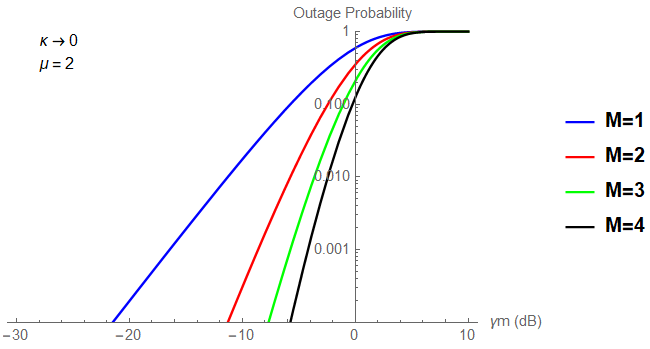

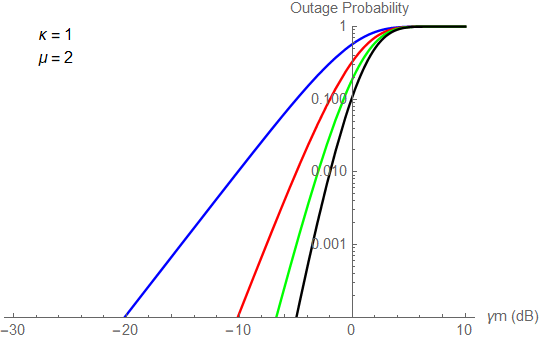

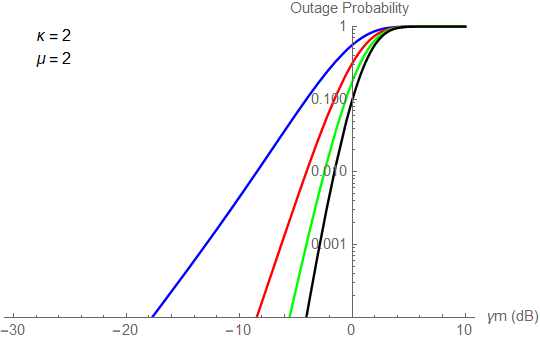

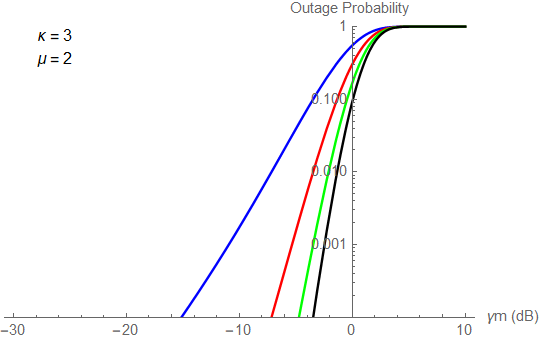

In [2]:
x1 = Image(filename='fig5.png') 
y1 = Image(filename='fig6.png')
z1 = Image(filename='fig7.png')
k1 = Image(filename='fig8.png')
display(x1, y1, z1, k1)

É importante notar que o primeiro dos plots acima representa a curva da **distribuição Nakagami** ($\kappa \rightarrow 0$  e $\mu = 2$). 

Além disso, com o aumento da quantidade de cópias do sinal (ramos de diversidade) $M$, a probabilidade da SNR do sinal recebido ser menor que um limiar é cada vez menor. Desse modo, tem-se uma significativa melhora do sistema (probabilidade de *outage* menor).

#### Parte 2.

Na segunda parte desse trabalho, encontraremos a taxa de erro de bit do sistema, considerando as modulações FSK e DPSK não-coerentes. Para isso, note que:

$w = \dfrac{\gamma}{\bar{\gamma}}$ $\Rightarrow$ $\dfrac{dw}{d\gamma}=\dfrac{1}{\bar{\gamma}}$

Do paper [$\kappa-\mu$](http://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf), sabemos que a densidade de probabilidade com relação a potência normalizada é:

$f_{\Omega}(w) = \displaystyle\frac{\mu(1+\kappa)^{\frac{\mu+1}{2}}}{\kappa^{\frac{\mu-1}{2}}exp[\mu\kappa]}w^{\frac{\mu-1}{2}}exp[-\mu(1+\kappa)w]I_{\mu-1}[2\mu\sqrt{\kappa(1+\kappa)w}]$

Fazendo a transformada de variáveis, tal que $f_{\Omega}(w)dw = f_{\Gamma}(\gamma)d(\gamma)$, temos:

$f_{\Gamma}(\gamma) = \dfrac{1}{\bar{\gamma}}f_{\Omega}\left(\dfrac{\gamma}{\bar{\gamma}}\right)$

Portanto,

$f_{\Gamma}(\gamma) = \displaystyle\frac{\mu(1+\kappa)^{\frac{\mu+1}{2}}}{\kappa^{\frac{\mu-1}{2}} exp[\mu\kappa]}\frac{\gamma^{\frac{\mu-1}{2}}}{\bar{\gamma}^{\frac{\mu+1}{2}}}exp\left[-\mu(1+\kappa)\frac{\gamma}{\bar{\gamma}}\right] I_{\mu-1}\left[2\mu\sqrt{\kappa(1+\kappa)\frac{\gamma}{\bar{\gamma}}}\right]$

Como isso, podemos achar a taxa de erro de bit (BER) do sistema:

BER = $ \displaystyle\int_{0}^\infty prob(error|\gamma_m)f_{\Gamma}(\gamma)  d\gamma_m$

$prob(error|\gamma_m) = \dfrac{1}{2}exp(\alpha\gamma)$ é a probabilidade de erro de bit para as modulações FSK e DPSK não-coerentes, onde $\alpha = 0.5$ para a modulação FSK e $\alpha = 1$ para a modulação DPSK. Com isso, podemos encontrar a taxa de erro de bit para diferentes SNRs médias. 

Os plots a seguir, portanto, são referentes ao cálculo da BER para os esquemas de modulações FSK e DPSK não-coerentes, computados no **Wolfram Mathematica** (arquivo parte2.nb). As duas primeiras imagens consideram o esquema de modulação FSK, sendo a primeira com $\kappa = 2$ fixo e $\mu$ variável, enquanto a segunda fixa o $\mu = 2$ e varia $\kappa$. Por fim, as duas últimas imagens consideram o esquema DPSK, com a mesma seleção de parâmetro das primeiras imagens.

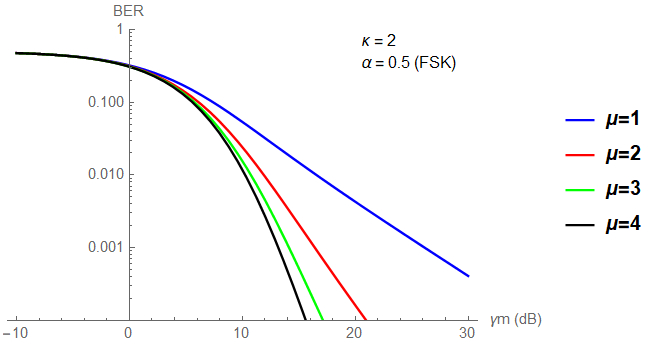

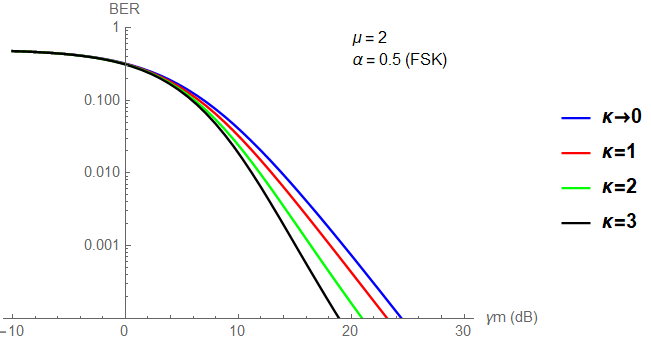

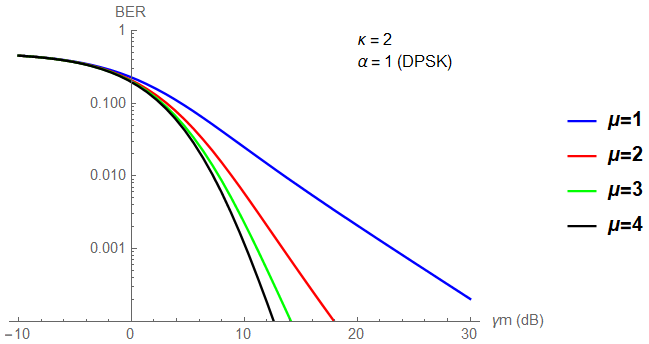

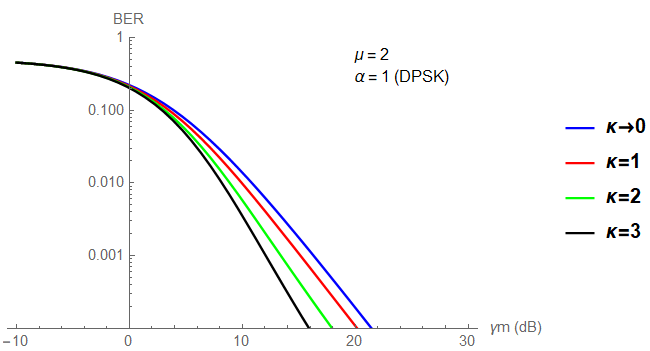

In [3]:
x2 = Image(filename='fig9.png') 
y2 = Image(filename='fig10.png')
z2 = Image(filename='fig11.png')
k2 = Image(filename='fig12.png')
display(x2, y2, z2, k2)

É imediato ver que, em termos gerais, a modulação DPSK possui uma taxa de erro menor que a FSK, tendo, portanto, uma melhor performance do sistema. Além disso, aumentar $\kappa$ ou $\mu$ (ou aumentar a razão entre a potência total dos componentes dominantes com as espalhadoras) também aprimora a performance, sendo isso mais expressivo com o acréscimo de $\mu$.

#### Parte 3.

Para a terceira e última parte deste trabalho, devemos calcular a probabilidade de erro em uma mensagem codificada. Para codificar, consideramos o **código de *Golay*(23,12)**.

Desse modo, temos que: $P_{eM} = 1 - \sum_{m=0}^t p(N,m)$.

Da expressão acima, $p(N,m) = {N\choose m}(1-BER)^{N-m}BER^m$, e que num código genérico $A(N,k)$ $N$ representa a palavra-código (número de bits total, sendo a soma dos bits de informação e redundância), $n-k$ os bits de redundância, $k$ o número de bits de informação, $t$ o número de bits corrigidos e a SNR média codificada $\gamma_{cod}=\dfrac{K}{N}\gamma_m$.

Os plots estão no arquivo parte3.nb, onde os dois primeiros correspondem a um $\kappa = 2$ fixo e $\mu$ variando de 1 a 4, bem como o tipo de modulação (FSK e DPSK não-coerentes). O mesmo ocorre para os dois últimos gráficos, diferenciando apenas que o parâmetro que varia é o $\kappa$ (tendendo a zero até 3), enquanto que $\mu$ fica fixo em 2.

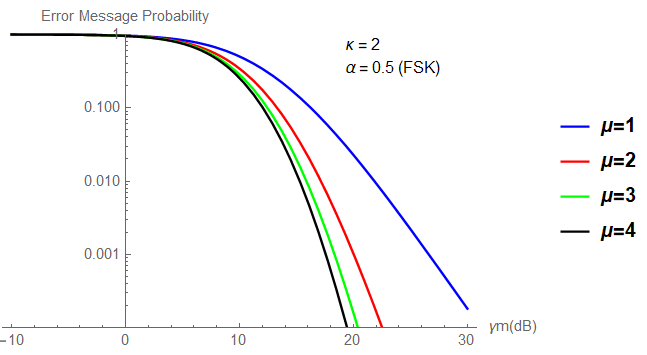

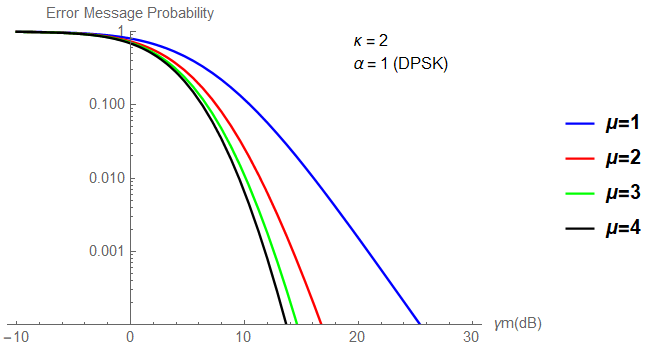

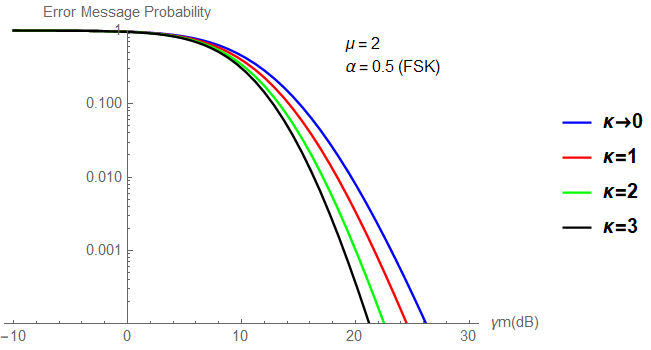

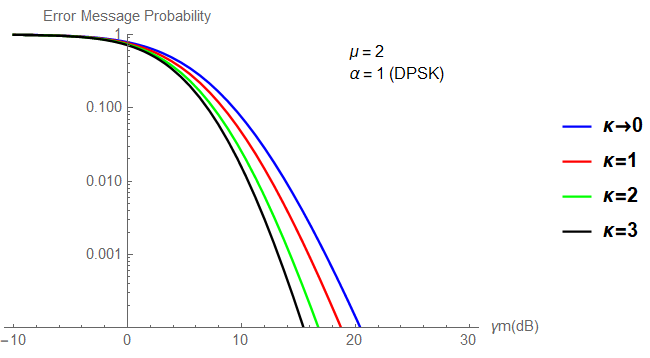

In [4]:
x3 = Image(filename='fig13.png') 
y3 = Image(filename='fig14.png')
z3 = Image(filename='fig15.png')
k3 = Image(filename='fig16.png')
display(x3, y3, z3, k3)

Notamos que, assim como nos plots das BERs, com aumento dos parâmetros $\kappa$ e $\mu$ tem-se um significativo aumento na performance do sistema. O mesmo ocorre com a mudança do esquema de modulação FSK para o DPSK (não-coerentes). Além disso, a probabilidade de erro na mensagem codificada (utilizando códigos de *Golay*) é maior do que sem codificação. A codificação de *Golay* é capaz de corrigir 3 dos 23 bits do quadro de mensagem.